In [1]:
#final anforcom_ga pke train_test_split

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#TRAIN
train_data=pd.read_csv('train.csv')
train_data.head()

,id,phase,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,...,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20,station,network
0,0,After Coda End,-40.060604,-260.707855,-2295.125732,-5077.934570,-6510.237793,-6507.307617,-6570.841309,-6639.744141,...,-1636.636719,-481.137634,1250.591431,3423.129150,5408.335938,7083.473633,8639.500977,9888.334961,AOS,HT
1,1,After Coda End,-918.338989,-130.808212,-180.710327,-888.181763,-1270.482300,-1396.425903,-1328.800293,-1324.853394,...,-606.994751,-341.463318,-216.040726,-132.499832,415.490448,750.097290,1068.296143,1360.592407,AOS,HT
2,2,S Wave,-19588.193359,-22775.435547,-14151.219727,-1106.306152,479.042145,8777.960938,27075.169922,24998.861328,...,-6982.862305,-3364.717285,6015.947266,-10893.664062,-9635.690430,2515.936035,5403.634766,7697.293945,AC04,C1
3,3,Before P Arrival,71.364502,102.589439,140.858856,113.558861,72.772079,97.952866,132.099426,98.619576,...,-33.640625,-28.372875,-31.518494,-40.343090,-43.658840,-37.447033,-41.053375,-54.754852,AOS,HT
4,4,After Coda End,11264.663086,16095.182617,16701.796875,15911.804688,13841.098633,11352.826172,9862.090820,9329.799805,...,122089.867188,141905.125000,157348.359375,169389.234375,178161.437500,185418.484375,191004.015625,193284.250000,AMT,HP


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35886 entries, 0 to 35885
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       35886 non-null  int64  
 1   phase    35886 non-null  object 
 2   E-1      35886 non-null  float64
 3   E-2      35886 non-null  float64
 4   E-3      35886 non-null  float64
 5   E-4      35886 non-null  float64
 6   E-5      35886 non-null  float64
 7   E-6      35886 non-null  float64
 8   E-7      35886 non-null  float64
 9   E-8      35886 non-null  float64
 10  E-9      35886 non-null  float64
 11  E-10     35886 non-null  float64
 12  E-11     35886 non-null  float64
 13  E-12     35886 non-null  float64
 14  E-13     35886 non-null  float64
 15  E-14     35886 non-null  float64
 16  E-15     35886 non-null  float64
 17  E-16     35886 non-null  float64
 18  E-17     35886 non-null  float64
 19  E-18     35886 non-null  float64
 20  E-19     35886 non-null  float64
 21  E-20     358

In [44]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [45]:
train_missing= missing_values_table(train_data)
train_missing

Your selected dataframe has 64 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [46]:
train_data.columns

Index(['id', 'phase', 'E-1', 'E-2', 'E-3', 'E-4', 'E-5', 'E-6', 'E-7', 'E-8',
       'E-9', 'E-10', 'E-11', 'E-12', 'E-13', 'E-14', 'E-15', 'E-16', 'E-17',
       'E-18', 'E-19', 'E-20', 'N-1', 'N-2', 'N-3', 'N-4', 'N-5', 'N-6', 'N-7',
       'N-8', 'N-9', 'N-10', 'N-11', 'N-12', 'N-13', 'N-14', 'N-15', 'N-16',
       'N-17', 'N-18', 'N-19', 'N-20', 'Z-1', 'Z-2', 'Z-3', 'Z-4', 'Z-5',
       'Z-6', 'Z-7', 'Z-8', 'Z-9', 'Z-10', 'Z-11', 'Z-12', 'Z-13', 'Z-14',
       'Z-15', 'Z-16', 'Z-17', 'Z-18', 'Z-19', 'Z-20', 'station', 'network'],
      dtype='object')

In [4]:
label = {
    'phase' : {
        'Before P Arrival' : 0,
        'P Arrival' : 1,
        'P Wave' : 2,
        'S Arrival' : 3,
        'S Wave' : 4,
        'Coda End' : 5,
        'After Coda End' : 6,
    }
}

In [5]:
train_data.replace(label, inplace=True)
train_data['phase'].value_counts()

6    16562
4    13322
0     3780
2     1862
1      120
3      120
5      120
Name: phase, dtype: int64

In [6]:
df1 = train_data.groupby(['phase']).count()['E-1'].reset_index()
df1.columns = ['Phase','Count']
df1.head()

,Phase,Count
0,0,3780
1,1,120
2,2,1862
3,3,120
4,4,13322


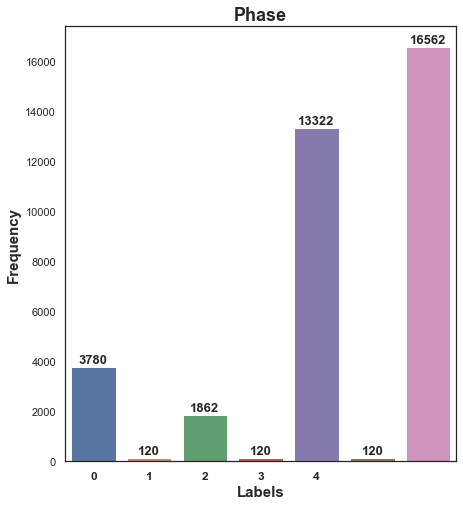

In [7]:
sns.set(style="white")

# membuat bar chart
plt.figure(figsize = (7, 8))
ax = sns.barplot(
    x = 'Phase',
    y = 'Count',
    data = df1)
ax.set_xticklabels(['0','1','2','3','4'], fontsize = 12, fontweight = 'semibold')

# membuat judul dan merubah nama xlabel & ylabel
plt.title('Phase', fontsize = 18, fontweight = 'bold')
plt.xlabel('Labels', fontsize = 15, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 15, fontweight = 'bold');

# memunculkan angka di tiap bar
for x in ax.patches:
    ax.annotate(
            format(x.get_height(), '.0f'),
            (x.get_x() + x.get_width() / 2., x.get_height()), 
            ha = 'center',
            va = 'center',
            fontweight = 'bold',
            size = 13,
            xytext = (0, 7), 
            textcoords = 'offset points')

In [49]:
#One Hot Encoding
Network=train_data[['network']]
Network=pd.get_dummies(Network,drop_first=True)
Network.head()

,network_HP,network_HT
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0


In [50]:
Station=train_data[['station']]
Station=pd.get_dummies(Station,drop_first=True)
Station.head()

,station_AMT,station_AOS
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0


In [51]:
final_train = pd.concat([train_data,Network,Station], axis=1)
final_train.drop(['network','station'], axis=1, inplace=True)
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35886 entries, 0 to 35885
Data columns (total 66 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           35886 non-null  int64  
 1   phase        35886 non-null  int64  
 2   E-1          35886 non-null  float64
 3   E-2          35886 non-null  float64
 4   E-3          35886 non-null  float64
 5   E-4          35886 non-null  float64
 6   E-5          35886 non-null  float64
 7   E-6          35886 non-null  float64
 8   E-7          35886 non-null  float64
 9   E-8          35886 non-null  float64
 10  E-9          35886 non-null  float64
 11  E-10         35886 non-null  float64
 12  E-11         35886 non-null  float64
 13  E-12         35886 non-null  float64
 14  E-13         35886 non-null  float64
 15  E-14         35886 non-null  float64
 16  E-15         35886 non-null  float64
 17  E-16         35886 non-null  float64
 18  E-17         35886 non-null  float64
 19  E-18

In [52]:
#TEST
test_data=pd.read_csv('test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23924 entries, 0 to 23923
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       23924 non-null  int64  
 1   E-1      23924 non-null  float64
 2   E-2      23924 non-null  float64
 3   E-3      23924 non-null  float64
 4   E-4      23924 non-null  float64
 5   E-5      23924 non-null  float64
 6   E-6      23924 non-null  float64
 7   E-7      23924 non-null  float64
 8   E-8      23924 non-null  float64
 9   E-9      23924 non-null  float64
 10  E-10     23924 non-null  float64
 11  E-11     23924 non-null  float64
 12  E-12     23924 non-null  float64
 13  E-13     23924 non-null  float64
 14  E-14     23924 non-null  float64
 15  E-15     23924 non-null  float64
 16  E-16     23924 non-null  float64
 17  E-17     23924 non-null  float64
 18  E-18     23924 non-null  float64
 19  E-19     23924 non-null  float64
 20  E-20     23924 non-null  float64
 21  N-1      239

In [53]:
network=test_data[['network']]
network=pd.get_dummies(network,drop_first=True)
network.head()

,network_HP,network_HT
0,1,0
1,1,0
2,0,0
3,0,1
4,0,1


In [54]:
station=test_data[['station']]
station=pd.get_dummies(network,drop_first=True)
station.head()

,network_HP,network_HT
0,1,0
1,1,0
2,0,0
3,0,1
4,0,1


In [55]:
final_test = pd.concat([test_data,network,station], axis=1)
final_test.drop(['network','station'], axis=1, inplace=True)
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23924 entries, 0 to 23923
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          23924 non-null  int64  
 1   E-1         23924 non-null  float64
 2   E-2         23924 non-null  float64
 3   E-3         23924 non-null  float64
 4   E-4         23924 non-null  float64
 5   E-5         23924 non-null  float64
 6   E-6         23924 non-null  float64
 7   E-7         23924 non-null  float64
 8   E-8         23924 non-null  float64
 9   E-9         23924 non-null  float64
 10  E-10        23924 non-null  float64
 11  E-11        23924 non-null  float64
 12  E-12        23924 non-null  float64
 13  E-13        23924 non-null  float64
 14  E-14        23924 non-null  float64
 15  E-15        23924 non-null  float64
 16  E-16        23924 non-null  float64
 17  E-17        23924 non-null  float64
 18  E-18        23924 non-null  float64
 19  E-19        23924 non-nul

In [56]:
X_train = final_train.drop(['id', 'phase'], axis=1)
y_train = final_train['phase']
X_test = final_test.drop(['id'], axis=1)

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35886 entries, 0 to 35885
Data columns (total 64 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E-1          35886 non-null  float64
 1   E-2          35886 non-null  float64
 2   E-3          35886 non-null  float64
 3   E-4          35886 non-null  float64
 4   E-5          35886 non-null  float64
 5   E-6          35886 non-null  float64
 6   E-7          35886 non-null  float64
 7   E-8          35886 non-null  float64
 8   E-9          35886 non-null  float64
 9   E-10         35886 non-null  float64
 10  E-11         35886 non-null  float64
 11  E-12         35886 non-null  float64
 12  E-13         35886 non-null  float64
 13  E-14         35886 non-null  float64
 14  E-15         35886 non-null  float64
 15  E-16         35886 non-null  float64
 16  E-17         35886 non-null  float64
 17  E-18         35886 non-null  float64
 18  E-19         35886 non-null  float64
 19  E-20

In [62]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [15]:
param_grid = { 
              'n_estimators':np.arange(200, 250), 
              'max_depth':np.arange(10, 15), 
              'random_state':np.arange(20, 30),
}

rscv = RandomizedSearchCV(rfc,param_grid,scoring='accuracy',n_iter=20,cv=5)
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [16]:
rscv.best_params_

{'random_state': 26, 'n_estimators': 247, 'max_depth': 14}

In [17]:
rscv.best_score_

0.8837986528045981

In [ ]:
# masukin best params ke rfc

In [57]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [58]:
#RFC
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state = 26,n_estimators=247,max_depth=14)
model_rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)

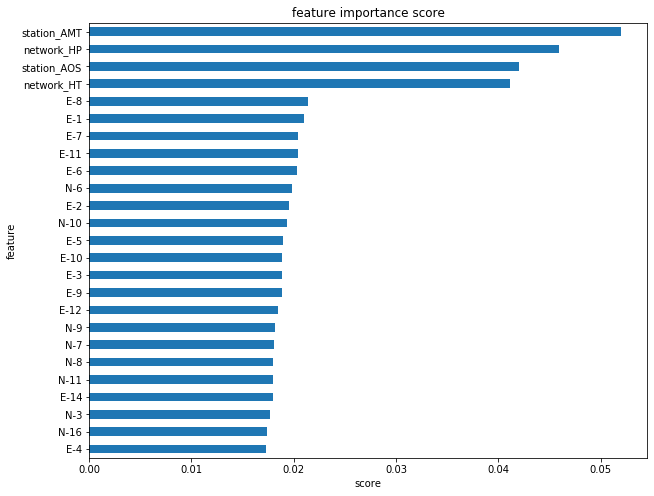

In [59]:
show_feature_importance(model_rfc)

In [36]:
hasil_rfc = pd.DataFrame({
    'id' : final_test['id'],
    'phase' : pred_rfc
})

print(hasil_rfc.shape)

hasil_rfc['phase'].value_counts()

(23924, 2)


6    12987
4     6983
0     2887
2      930
3       60
1       40
5       37
Name: phase, dtype: int64

In [37]:
hasil_rfc.to_csv('submission_rfc000.csv',index=False)

In [22]:
from sklearn.model_selection import train_test_split
X = final_train.drop(['id','phase'],axis=1)
y = final_train['phase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train) # fit model regression dari data train
pred_knn = model_knn.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_knn))

0.8799290720256692


# RFC

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_features='sqrt', max_depth=15, min_samples_split=2, min_samples_leaf=1, n_estimators=400)
model_rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_rfc))

0.8834754707422106


# DECISION TREE

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train) # fit model decision tree dari data train
pred_dt = model_knn.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_dt))

0.8799290720256692


# ADA BOOST

In [30]:
from sklearn.ensemble import AdaBoostClassifier
model_abc = AdaBoostClassifier()
model_abc.fit(X_train, y_train) # fit model decision tree dari data train
pred_abc = model_abc.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_abc))

0.5083171493709364


# XGBOOST

In [35]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train) # fit model decision tree dari data train
pred_xgb = model_xgb.predict(X_test)

C:\Users\Zaki\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_xgb))

0.9162374398378789


In [40]:
acc_random_forest = accuracy_score(y_test,pred_rfc)
acc_abc = accuracy_score(y_test,pred_abc)
acc_xgb = accuracy_score(y_test,pred_xgb)
acc_knn = accuracy_score(y_test,pred_knn)
acc_dt = accuracy_score(y_test,pred_dt)


models = pd.DataFrame({
    'Model': [ 'Random Forest', 'AdaBoost','XGBoost','KNN','Decision Tree'],
    'Score': [acc_random_forest,acc_abc,acc_xgb,acc_knn,acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,XGBoost,0.916237
0,Random Forest,0.883475
3,KNN,0.879929
4,Decision Tree,0.879929
1,AdaBoost,0.508317
